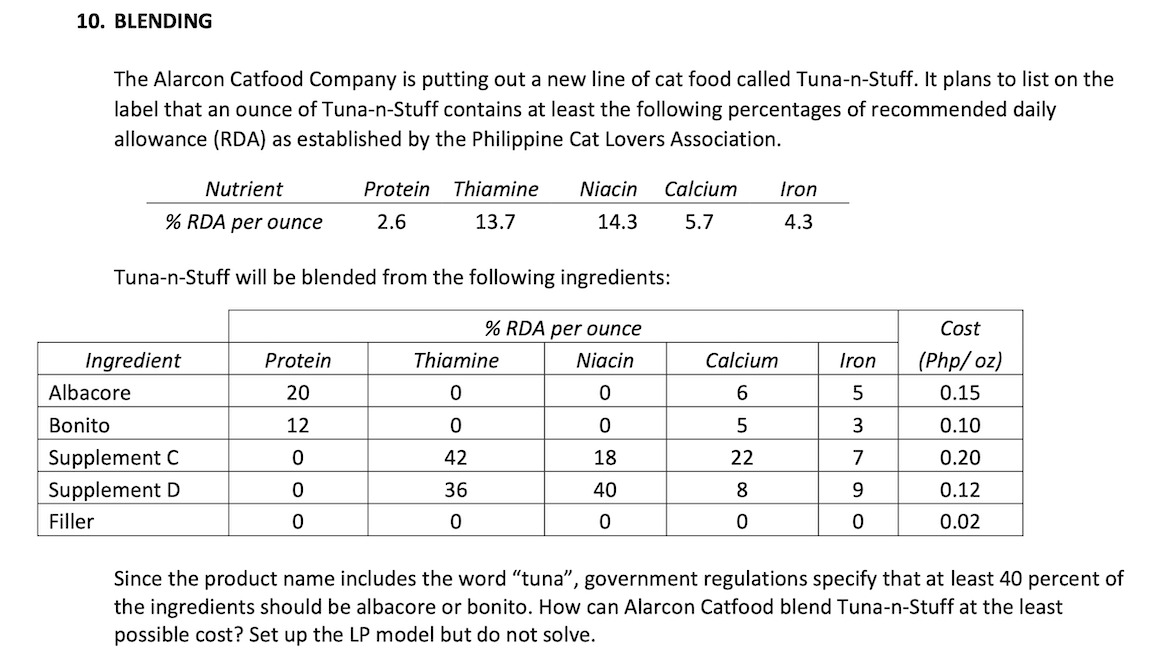

In [2]:
from pulp import *
import pandas as pd

In [4]:
# Initialize the LP
model = LpProblem('Product Mix', LpMinimize)

# Decision Variables
x = LpVariable.dicts('x', [1, 2, 3, 4, 5], lowBound=0, cat='Integer') # Ingredients

# Objective Function
model += .15 * x[1] + .1 * x[2] + .2 * x[3] + .12 * x[4] + .02 * x[5], "Total Minimal Cost"

# Add Constraints
model += .20 * x[1] + .12 * x[2] >= .026, "Protein"
model += .42 * x[3] + .36 * x[4] >= .137, "Thiamine"
model += .18 * x[3] + .40 * x[4] >= .143, "Niacin"
model += .06 * x[1] + .05 * x[2] + .22 * x[3] + .08 * x[4] >= .057, "Calcium"
model += .05 * x[1] + .03 * x[2] + .07 * x[3] + .09 * x[4] >= .043, "Iron"
model += x[1] + x[2] >= .4, "Albacore and Bonito"

print(model)

# Solve the modellem
status = model.solve()
print(LpStatus[status])

# Display variables
for var in model.variables():
    print(f"{var.name} = {var.varValue}")

# Display objective
min_ingredients = value(model.objective)
print(f"max profit = {min_ingredients}")

Product_Mix:
MINIMIZE
0.15*x_1 + 0.1*x_2 + 0.2*x_3 + 0.12*x_4 + 0.02*x_5 + 0.0
SUBJECT TO
Protein: 0.2 x_1 + 0.12 x_2 >= 0.026

Thiamine: 0.42 x_3 + 0.36 x_4 >= 0.137

Niacin: 0.18 x_3 + 0.4 x_4 >= 0.143

Calcium: 0.06 x_1 + 0.05 x_2 + 0.22 x_3 + 0.08 x_4 >= 0.057

Iron: 0.05 x_1 + 0.03 x_2 + 0.07 x_3 + 0.09 x_4 >= 0.043

Albacore_and_Bonito: x_1 + x_2 >= 0.4

VARIABLES
0 <= x_1 Integer
0 <= x_2 Integer
0 <= x_3 Integer
0 <= x_4 Integer
0 <= x_5 Integer

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/jason/Documents/GitHub/naut/quantitative_analysis/env/lib/python3.10/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/fb/p1td_8397cg27vvh9njm_gtm0000gn/T/8201096147874268b4ce0fc2b768b72e-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /var/folders/fb/p1td_8397cg27vvh9njm_gtm0000gn/T/8201096147874268b4ce0fc2b768b72e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 11 COLUMNS
At line